# Chương 11. Machine Learning by an Artificial Neural Network

- Trong chương này, bạn sẽ học cách xây dựng **ANN (Artificial Neural NetWork)** và huấn luyện nó để thực hiện phân loại hình ảnh và nhận dạng đối tượng. ANN là một trong những tập hợp con của Machine Learning và chúng ta sẽ nói riêng về **mạng MLP (Multilayer Perceptron)**, đây là loại mạng thần kinh phổ biến nhất trên bài toán nhận dạng khuông mẫu (pattern recognition).

## Đến cuối chương này, chúng ta sẽ có những điều sau:
- Sự khác biệt giữa học máy (ML) và mạng nơ ron nhân tạo (ANN)
- Mạng tri giác nhiều lớp (MLP)
- Cách xác định và triển khai mạng MLP
- Đánh giá và cải thiện ANN của chúng tôi
- Cách nhận dạng đối tượng trong ảnh bằng ANN được đào tạo

## Nội dung:
1. **Machine learning (ML) versus artificial neural network (ANN)**
2. **How does ANN work?**
3. **How to define multi-layer perceptrons (MLP)**
4. **How to implement an ANN-MLP classifier?**

*Xin phép trình bày bằng tiếng anh vì muốn giữ rõ ràng ý của tác giả.*

## 1. Machine learning (ML) versus artificial neural network (ANN)

- As mentioned earlier, an ANN is a subset of ML. ANNs are inspired by human understanding; they work as our brain does, composed of different interconnected layers of neurons, where each of them receives information from previous one, processes it, and sends it to the next one until the final output is received. This output could be from a labeled output in the case of supervised learning or certain criteria matching in the case of unsupervised learning.

- What are the peculiarities of an ANN? Machine learning is defined as the area in computer science that focuses on trying to find patterns within data sets, and ANN is more oriented toward simulating how human brains are connected to make that work, splitting pattern detection across several layers/nodes that we will call neurons.

- Meanwhile, other machine learning algorithms such as **support vector machine (SVM)** are more popular and established on the object pattern recognition and classification. SVM has one of the best accuracies in machine learning algorithms. ANN has a larger set of applications that are able to detect patterns on most any kind of data structure (SVM works mostly with feature vectors) and can be more parameterized to achieve different goals within the same implementation.

- Moreover, another advantage of ANN over other ML strategies such as SVM is that ANN is a probabilistic classifier allowing multi-class classification. This means that it can detect more than a single object within an image; whereas on the flip side, SVM is a nonprobabilistic binary classifier.

- When can an ANN be useful? Imagine we had implemented an object recognizer trained to recognize backpacks and footwear, and then we have the following image:

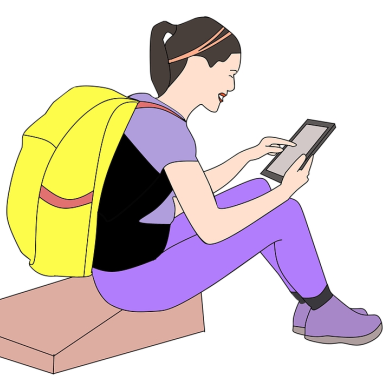

- We run our feature detector on it and we obtain a result as shown:

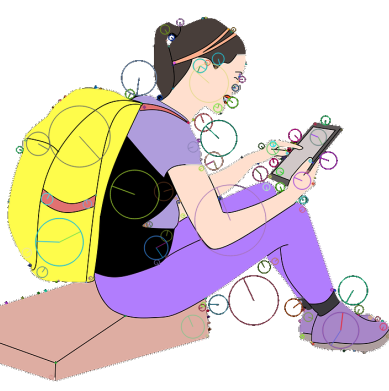

- As you can see from the previous image, our feature detector algorithm obtained feature vectors from the backpack and footwear of the girl. So if we run our SVM classifier from Chapter 9, Object Recognition, on this image, due to the linear classifier implementation, it would rather detect only the backpack even if the image contains footwear as well.

- **SVM might also perform a non-linear classification using something called a kernel trick and implicitly map the inputs into high-dimensional feature spaces.**

## 2. How does ANN work?

- In this section, we will see which are the elements taking part in an ANN-MLP. First, we will represent a regular ANN-MLP shape with one layer each of input, output, and hidden, and how the information flows across them:

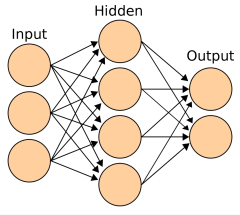

- An MLP network is formed by at least three layers:
    + **Input layer**: Every MLP always has one of these layers. It is a passive layer, which means that it does not modify the data. It receives information from the outside world and sends it out to the network. The number of nodes (neurons) in this layer will depend on the amount of features or descriptive information we want to extract from the images. For example, in case of using feature vectors, there will be one node for each of the columns within the vector.
    + **Hidden layers**: This layer is where all the groundwork happens. It transforms the inputs into something that the output layer or another hidden layer can use (there can be more than one). This layer works as a black box, sensing patterns within received inputs and evaluating the weights on each of them. Its behavior will be defined by the equation provided by its activation function.
    + **Output layer**: This layer will also always exist, but the number of nodes in this case will be defined by the chosen neural network. This layer might have three neurons. The output layer may be built by a single node (linear regression), that is, we want to know whether an image has a backpack or not. But in the case of multi-class classification, this layer will contain several nodes, one per object, that we can identify. Each node will produce a value, by default in the range of $[-1,1]$, defining the probability of the object to be there or not and allowing multi-class detection on a single input image.

- Let's say we want to build a three-layered neural network with one of each: input, hidden, and output. The number of nodes in the input layer will be determined by the dimensionality of our data. The number of nodes in the output layer will be defined by the number of models we have. Regarding the hidden layer, the number of nodes or even layers will be determined by the complexity of the problem and the accuracy we want to add into the network. A high dimensionality will improve the accuracy on the results, but it will also add to the computational cost. Another decision to be taken for the hidden layer is the use of an activation function, which allows us to fit nonlinear hypotheses and obtain better pattern detection depending of the data provided. A common choice for activation functions is the Sigmoid function, which is the one used by default where outputs are evaluated in terms of probabilities, but there are others choices too such as **tanh** or **ReLUs**.

- On a deeper look at each neuron with a hidden layer, we can say that all of them behave in a similar way. Values are retrieved from the previous layer (input nodes), summed up with certain weights (individual for each neuron) plus the bias term. The sum is transformed using the activation function, f, that may also be different for different neurons, as represented in the following image.

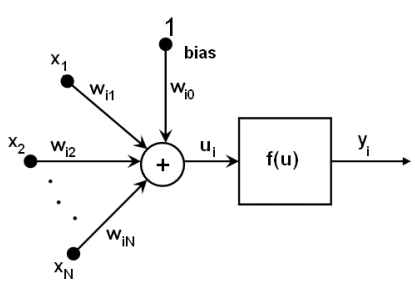

## 3. How to define multi-layer perceptrons (MLP)

- MLP is a branch of ANNs widely used in pattern recognition because of its ability of identify patterns within noisy or unexpected environments. MLP can be used to implement supervised and unsupervised learning (both of them were discussed *Chapter 9, Object Recognition*). In addition to that, MLP can also be used to implement another kind of learning such as reinforcement learning inspired by behavioral psychology, where the network learning is adjusted using reward/punishment actions.

- Defining an ANN-MLP consist of deciding the structure of the layers that will compose our net, and how many nodes will be in each of them. Firstly, we need to decide what the goal of our network is. For instance, we could implement an object recognizer, in which case, the number of nodes belonging to the output layer will be the same as the number of different objects we want to identify. Simulating the example from *Chapter 9, Object Recognition*, in the case of recognizing handbags, footwear, and dresses, the output layer will have three nodes, and their values will be mapped as tuples of probabilities instead of a fixed values such as $[1,0,0], [0,1,0]$, and [0,0,1]$. Therefore, it would be possible to identify more than one single class in the same image, for example, a girl with a backpack wearing slippers.

- Once we have decided the outcome of our network, we should define which meaningful information of each object to recognize could be inserted into our network to be able to identify objects into unknown images. There are several approaches as a feature descriptor for the images. We could use **Histogram of Orient Gradients (HOG)**, which counts occurrences of gradient orientation in localized portions of an image, or *Color Histogram*, which represents the distribution of colors in the image, or we could also extract image features using dense feature detectors with SIFT or SURF algorithms. Since the number of descriptors need to be the same for every image inserted into the input layer, we will use the *Bag of Words* strategy, collecting all sets of descriptors into a single histogram of visual words as we did in *Chapter 9, Object Recognition*, for the use of the SVM recognizer. The histogram would look as shown here, where each of the bar values will be linked to one node within the input layer:

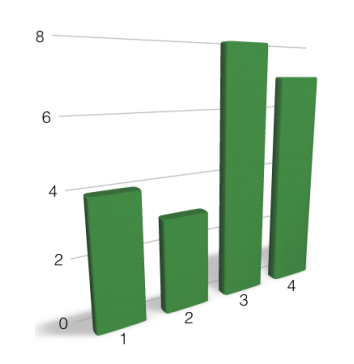

- At last, we come to hidden layers. This layer does not have a strictly defined structure, thus it will be a complex decision. There is a large discussion among different researchers on how to decide the number of hidden layers and the number of nodes in them. All of them rely on the complexity of the problem to resolve and finding a balance between performance and accuracy—more nodes/layers will have more accuracy but low performance. Also, a large number of nodes might cause and over-fitted network cause not only lower performance but also lower accuracy. In the case of a simple object recognizer with only three models, it does not require more than a single hidden layer, and regarding the number of nodes in there, we could take, for instance, Heaton research( https://www.heatonresearch.com/2017/06/01/hidden-layers.html ) , which sets the following rules:
    + The number of hidden neurons should be between the size of the input layer and the size of the output layer
    + The number of hidden neurons should be two-thirds of the size of the input layer plus the size of the output layer
    + The number of hidden neurons should be less than twice the size of the input layer

## 4. How to implement an ANN-MLP classifier ?

- After all that theoretical explanation on how to implement an ANN, we will implement it ourself. For that, and as we did also in the SVM classifier, we will download the training images from the same source **Caltech256**: http://www.vision.caltech.edu/Image_Datasets/Caltech256/
-  We will start with a few items, easily extendable to many other, creating a folder, *images*, with a subfolder for each of the categories that we will classify: *dresses*, *footwear*, and *bagpack*. We will take a bunch of images for each of them; around 20-25 images should be enough for the training, and on top of that we will include another set of sample images, which we will use for evaluating the accuracy of our network after the training.

- As we discussed earlier, we need to align the number of descriptors for each of the images using a **Bag of Words (BOW)**. For that, we will first extract the feature vectors for each of the images using dense feature detectors for the keypoints of each image feed and then forward the vectors into k-means clustering to extract the centroids, which will help us to finally obtain the BOW.

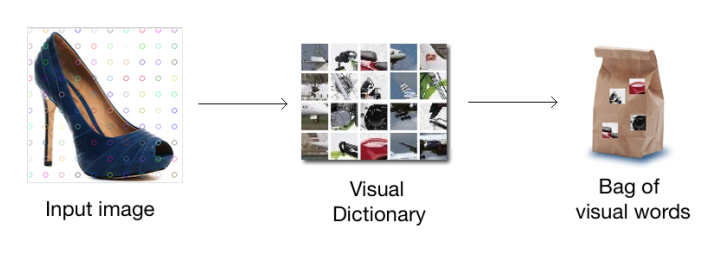

- As you can recognize from the previous image, it was the same process we implemented during the SVM classifier. In order to save some time and code, we will take advantage of the *create_features.py* file created earlier to extract all the feature descriptors we will use as the input of our MLP network.

By running the following command, we will obtain every map file required for the next step:

- Within the feature_map.pkl file, we have a vector of features of each of the images which will take part during the training phase. First, we will create a class for our ANN classifier, where we will set the sizes of our network layers:

In [1]:
from sklearn import preprocessing
import numpy as np
import cv2
import random

class ClassifierANN(object):
    def __init__(self, feature_vector_size, label_words):
        self.ann = cv2.ml.ANN_MLP_create()
        self.label_words = label_words
        
        # Number of centroids used to build the feature vectors
        input_size = feature_vector_size
        
        # Number of models to recongnize
        output_size = len(label_words)
        
        # Applying Heaton rules
        hidden_size = (input_size * (2/3)) + output_size
        nn_config = np.array([input_size, hidden_size, output_size], dtype=np.uint8)
        self.ann.setLayerSizes(np.array(nn_config))
        
        # Symmetrical Sigmoid as activation function
        self.ann.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM, 2, 1)
        
        # Map models as tuples of probabilities
        self.le = preprocessing.LabelBinarizer()
        self.le.fit(label_words) # Label words are ['dress', 'footwear','backpack']

- As output, we decided to implement a tuple of probabilities with binary numbers $[0,0,1], [0,1,0], [1,0,0]$ aiming that way the option to obtain multi-class detection. As the activation function **symmetrical Sigmoid (NN_MLP_SIGMOID_SYM)**, which is the default choice for MLP, where outputs will be in the range of $[-1,1]$. This way, the output generated by our network will define probabilities instead of categorical outcomes, being able to identify two or three objects within the same sample image.

- For the training process, we will split our data set into two different sets: training and testing. We will define a ratio for it (usually, most of the examples recommend using 75% as the training set, but it could be adjusted until best accuracy is obtained) and randomize the selection of the items to prevent bias. How does that work?

In [2]:
from sklearn import preprocessing
import numpy as np
import cv2
import random

class ClassifierANN(object):
    def __init__(self, feature_vector_size, label_words):
        self.ann = cv2.ml.ANN_MLP_create()
        self.label_words = label_words
        
        # Number of centroids used to build the feature vectors
        input_size = feature_vector_size
        
        # Number of models to recongnize
        output_size = len(label_words)
        
        # Applying Heaton rules
        hidden_size = (input_size * (2/3)) + output_size
        nn_config = np.array([input_size, hidden_size, output_size], dtype=np.uint8)
        self.ann.setLayerSizes(np.array(nn_config))
        
        # Symmetrical Sigmoid as activation function
        self.ann.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM, 2, 1)
        
        # Map models as tuples of probabilities
        self.le = preprocessing.LabelBinarizer()
        self.le.fit(label_words) # Label words are ['dress', 'footwear','backpack']
        
    def train(self, training_set):
        label_words = [ item['label'] for item in training_set]
        dim_size = training_set[0]['feature_vector'].shape[1]
        train_samples = np.asarray([np.reshape(x['feature_vector'], (dim_size,)) for x in training_set])
        
        # Convert item labels into encoded binary tuples
        train_response = np.array(self.le.transform(label_words), dtype=np.float32)
        self.ann.train(np.array(train_samples, dtype=np.float32),cv2.ml.ROW_SAMPLE, np.array(train_response, dtype=np.float32))

- In this case, we had used the same weights for each of the nodes for our input layer (default behavior), but we could have specified them giving more weights to the columns within feature vector with more significant information.

### Evaluate a trained network

- To evaluate the robustness and accuracy of our trained MLP network, we will calculate the confusion matrix (also known as error matrix). This matrix will describe the performance of our classification model. Each row of the confusion matrix represents the instances in a predicted class, while each column represents the instances in an actual class (or vice versa). To fill up the matrix, we will use our testing set to evaluate it:

In [3]:
from collections import OrderedDict

def init_confusion_matrix(self, label_words):
    confusion_matrix = OrderedDict()
    for label in label_words:
        confusion_matrix[label] = OrderedDict()
    for label2 in label_words: confusion_matrix[label][label2] = 0
    return confusion_matrix

# Chooses the class with the greatest value, only one, in the tuple(encoded_word)
def classify(self, encoded_word, threshold=0.5):
    models = self.le.inverse_transform(np.asarray([encoded_word]), threshold)
    return models[0]

# Calculate the confusion matrix from given testing data set
def get_confusion_matrix(self, testing_set):
    label_words = [item['label'] for item in testing_set]
    dim_size = testing_set[0]['feature_vector'].shape[1]
    test_samples = np.asarray([np.reshape(x['feature_vector'], (dim_size,)) for x in testing_set])
    expected_outputs = np.array(self.le.transform(label_words), dtype=np.float32)
    confusion_matrix = self._init_confusion_matrix(label_words)
    retval, test_outputs = self.ann.predict(test_samples)
    for expected_output, test_output in zip(expected_outputs, test_outputs):
        expected_model = self.classify(expected_output)
        predicted_model = self.classify(test_output)
        confusion_matrix[expected_model][predicted_model] += 1
    return confusion_matrix

- As the sample confusion matrix, and considering a testing set of 30 elements, we might have obtained the following results:

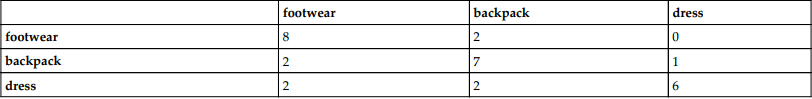

- Considering the previous matrix, we could calculate the accuracy of our trained network by the following formula:

### $$ACC = \frac{TP+TN}{TP+TN+FP+FN}$$

- In this formula, we have represented True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). In the case of footwear, we could say that its accuracy was 80%.

### $$ \frac{8+16}{8+16+4+2}=0.8$$

- The implementation code for the preceding formula is as follows:

In [4]:
def calculate_accuracy(confusion_matrix):
    acc_models = OrderedDict()
    for model in confusion_matrix.keys():
        acc_models[model] = {'TP':0, 'TN':0, 'FP':0, 'FN': 0}
    for expected_model, predicted_models in confusion_matrix.items():
        for predicted_model, value in predicted_models.items():
            if predicted_model == expected_model:
                acc_models[expected_model]['TP'] += value
                acc_models[predicted_model]['TN'] += value
            else:
                acc_models[expected_model]['FN'] += value
                acc_models[predicted_model]['FP'] += value
    for model, rep in acc_models.items():
        acc = (rep['TP']+rep['TN'])/(rep['TP']+rep['TN']+rep['FN']+rep['FP'])
        print('%s \t %f' % (model,acc))

- Collecting every code block from this section, we have already implemented the **ClassifierANN** class ready for its use:

In [5]:
###############
# training.py
###############
import pickle

def build_arg_parser():
    parser = argparse.ArgumentParser(description='Creates features for given images')
    parser.add_argument("--feature-map-file", dest="feature_map_file", required=True, help="Input pickle file containing the feature map")
    parser.add_argument("--training-set", dest="training_set", required=True, help="Percentage taken for training. ie 0.75")
    parser.add_argument("--ann-file", dest="ann_file", required=False, help="Output file where ANN will be stored")  
    parser.add_argument("--le-file", dest="le_file", required=False, help="Output file where LabelEncoder class will be stored")
        
if __name__ == '__main__':
    args = build_arg_parser().parse_args()
    
    # Load the Feature Map
    with open(args.feature_map_file, 'rb') as f:
        feature_map = pickle.load(f)
        
    training_set, testing_set = split_feature_map(feature_map, float(args.training_set))
    label_words = np.unique([item['label'] for item in training_set])
    cnn = ClassifierANN(len(feature_map[0]['feature_vector'][0]), label_words)
    cnn.train(training_set)
    print("===== Confusion Matrix =====")
    confusion_matrix = cnn.get_confusion_matrix(testing_set)
    print(confusion_matrix)
    print("===== ANN Accuracy =====")
    print_accuracy(confusion_matrix)
    if 'ann_file' in args and 'le_file' in args:
        print("===== Saving ANN =====")
        with open(args.ann_file, 'wb') as f:
            cnn.ann.save(args.ann_file)
        with open(args.le_file, 'wb') as f:
            pickle.dump(cnn.le, f)
        print('Saved in: ', args.ann_file)

NameError: name 'argparse' is not defined

- As you may have noticed, we have saved our ANN into two separate files, because ANN_MLP classes have their own save and load methods. We need to save label_words used to train our network. Pickle provides to us the functionalities to serialize and deserialize object structure and save and load them from disk, with the exception of some structure like ann which has its own implementation for it.

- Run the following command to obtain model files. The confusion matrix and accuracy probabilities will be displayed along with it:

- To obtain a better-trained network, we can repeat the previous command as many times as we desire until good accuracy results are obtained. This happens because the training and testing sets are taken randomly, so we should retain the one with the better outcome.

### Classifying images

- To implement our ANN classifier, we will need to reuse the method of the **FeatureExtractor** class from the *create_feature.py* file in *Chapter 9, Object Recognition*, which will allow us to calculate the feature vectors from the images we want to evaluate:

In [ ]:
class FeatureExtractor(object):
    def get_feature_vector(self, img, kmeans, centroids):
        return Quantizer().get_feature_vector(img, kmeans, centroids)

- Consider the inclusion of the *create_feature* file in the same folder. Now, we are ready to implement the classifier:

In [ ]:
###############
# classify_data.py
###############

import argparse
import _pickle as pickle

import cv2
import numpy as np

# import create_features as cf

# Classifying an image
class ImageClassifier(object):
    def __init__(self, ann_file, le_file, codebook_file):
        with open(ann_file, 'rb') as f:
            self.ann = cv2.ml.ANN_MLP_load(ann_file)
        with open(le_file, 'rb') as f:
            self.le = pickle.load(f)
            
        # Load the codebook
        with open(codebook_file, 'rb') as f:
            self.kmeans, self.centroids = pickle.load(f)
            
    def classify(self, encoded_word, threshold=None):
        models = self.le.inverse_transform(np.asarray(encoded_word), threshold)
        return models[0]
    
    # Method to get the output image tag
    def getImageTag(self, img):
        # Resize the input image
        img = cf.resize_to_size(img)
        
        # Extract the feature vector
        feature_vector = cf.FeatureExtractor().get_feature_vector(img, self.kmeans, self.centroids)
        
        # Classify the feature vector and get the output tag
        retval, image_tag = self.ann.predict(feature_vector)
        
        return self.classify(image_tag)
    
    def build_arg_parser():
        parser = argparse.ArgumentParser( description='Extracts features from each line and classifies the data')
        parser.add_argument("--input-image", dest="input_image", required=True, help="Input image to be classified")
        parser.add_argument("--codebook-file", dest="codebook_file", required=True, help="File containing the codebook")
        parser.add_argument("--ann-file", dest="ann_file", required=True, help="File containing trained ANN")
        parser.add_argument("--le-file", dest="le_file", required=True, help="File containing LabelEncoder class")
        return parser
    
if __name__=='__main__':
    args = build_arg_parser().parse_args()
    codebook_file = args.codebook_file
    input_image = cv2.imread(args.input_image)
    
    tag = ImageClassifier(args.ann_file, args.le_file,
    codebook_file).getImageTag(input_image)
    print("Output class:", tag)

- Run the following command to classify the images:

## Kết luận

- In this chapter, you learned the concept of ANN. You also learned that one of its uses within the field of object recognition is the implementation of MLP, including the advantages and disadvantages of MLP against other machine learning strategies, such as SVM. Regarding ANN-MLP, you learned which layers form its structure and how to define and implement them to build an image classifier and then learned how to evaluate an MLP, training its robustness and accuracy. And in the last section, we implemented an example of an MLP to detect an object in an unknown image.

- Remember that the world of computer vision is filled with endless possibilities! These documents is designed to help you the necessary skills to get started on a wide variety of projects. Now it's up to you and your imagination to use the skills you have acquired here to build something unique and interesting.